In [2]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import utils
import dataset
import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt

import shap

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

/usr/local/Caskroom/miniconda/base/envs/ufo-prediction/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
%load_ext autoreload
%autoreload 2

## Data

In [ ]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1)

In [ ]:
path_data_netherlands = os.path.join('..', 'data', 'netherlands-cities-200.csv')
data_netherlands = pd.read_csv(path_data_netherlands)
data_netherlands_sample = data_netherlands.sample(frac=.1)

In [ ]:
xgb_params_optimal = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

## Preprocessing

## Experiments

In [ ]:
predictor = AgePredictor(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor.evaluate_regression()

In [5]:
pred_df = pd.read_pickle('../predictions-generalization-cross-country-0.2-24826865-20221101-17-43-19.csv')

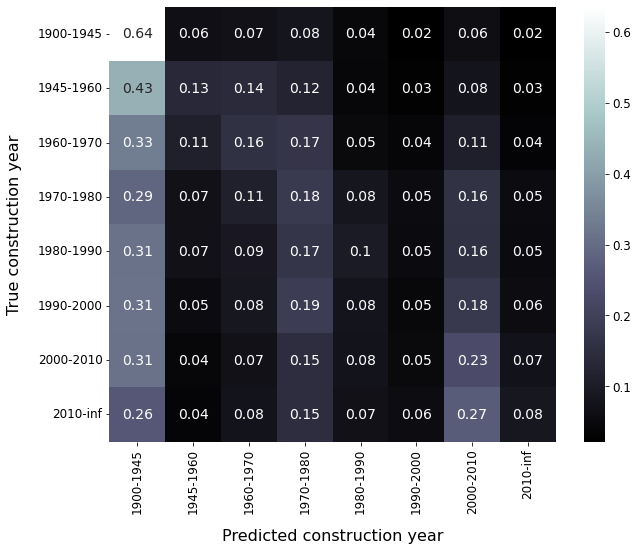

FixedFormatter should only be used together with FixedLocator


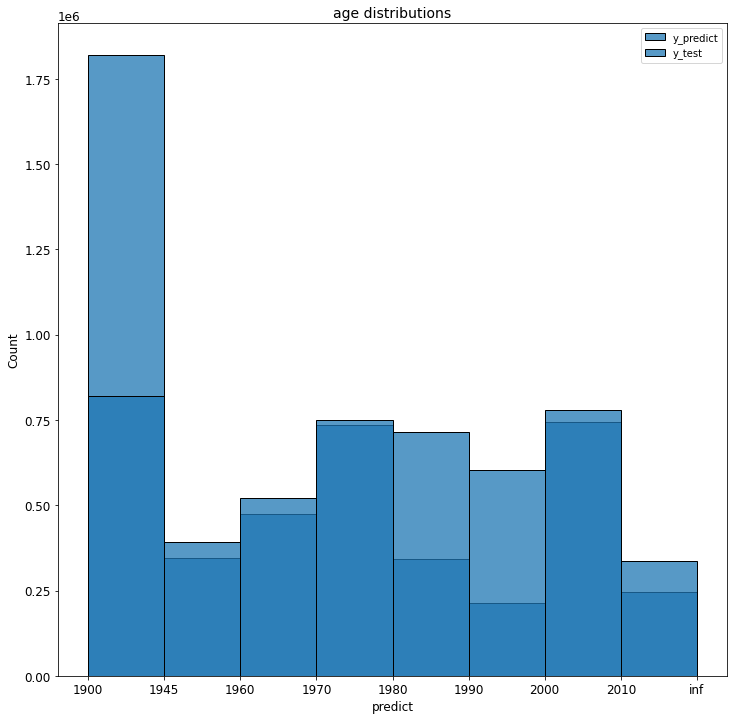

In [17]:
bins = [1900, 1945, 1960, 1970, 1980, 1990, 2000, 2010, np.inf]
labels = ['1900-1945', '1945-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-inf']
visualizations.plot_confusion_matrix(pred_df['test'], pred_df['predict'], class_labels=labels, figsize=(10, 8))
visualizations.plot_histogram(pred_df['test'], pred_df['predict'], bins=list(range(0, len(bins))), bin_labels=bins)


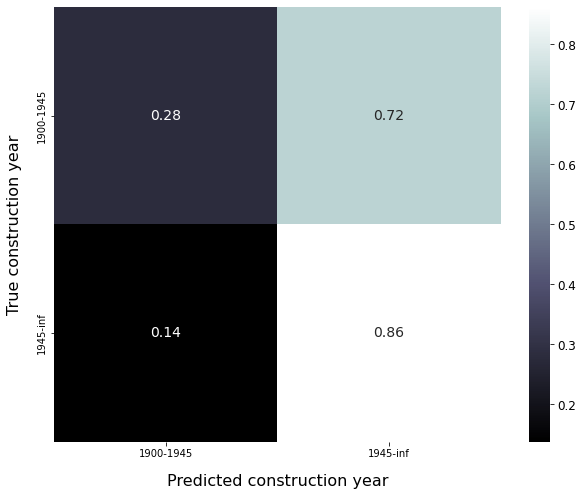

FixedFormatter should only be used together with FixedLocator


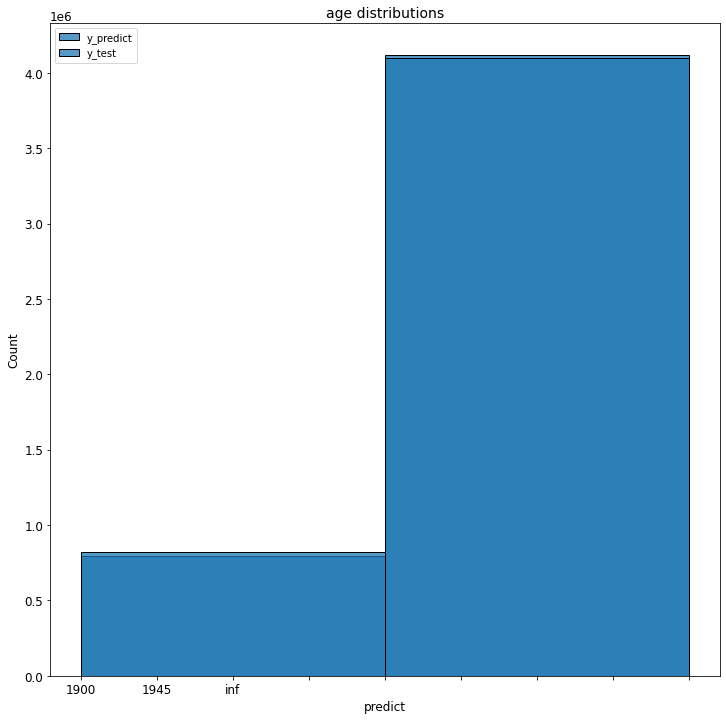

In [6]:
pred_binary_df = pd.read_pickle('../predictions-generalization-24865741-binary.pkl')

bins = [1900, 1945, np.inf]
labels = ['1900-1945', '1945-inf']
visualizations.plot_confusion_matrix(pred_binary_df['test'], pred_binary_df['predict'], class_labels=labels, figsize=(10, 8))
visualizations.plot_histogram(pred_binary_df['test'], pred_binary_df['predict'], bins=list(range(0, len(bins))), bin_labels=bins)

